In [52]:
import numpy as np
import pandas as pd
import random
import scipy.stats as sps
import matplotlib.pyplot as plt

random.seed(88)  

### Creating Dataframe

In [53]:
n=800
id_feature=list("ID"+str(i+100) for i in range(1,n+1))
random.shuffle(id_feature)

#Creating GroupA, B and C and then shuffling them

Group= np.repeat(['A', 'B', 'C'], repeats=[267, 267, 266])
random.shuffle(Group)

In [54]:
# Feature 1
mean = 2500
std = 300
feature_1 = sps.norm.rvs(mean, std, size=n)
feature_1.mean()

2526.402682623192

In [55]:
# Feature 2
mean_2 = 400
std_2 = 15
feature_2 = sps.norm.rvs(mean_2, std_2, size=n)
feature_2.mean()

400.09902034855173

In [56]:
# Dataframe
data = pd.DataFrame({"ID":id_feature,"Group":groups,"Feature_1":feature_1,"Feature_2":feature_2})
data['Group'].value_counts()

A    267
B    267
C    266
Name: Group, dtype: int64

In [57]:
# Feature 3
data['Feature_3'] = np.nan
data.loc[data['Group'] == 'A', 'Feature_3'] = 3 * data['Feature_1'] - 5 * data['Feature_2']
data.loc[data['Group'] == 'B', 'Feature_3'] = 2 * data['Feature_1']
data.loc[data['Group'] == 'C', 'Feature_3'] = -data['Feature_1'] + data['Feature_2']

In [58]:
# Adding noise to Feature 3
mean_3 = 0
std_3 = 12
condition = sps.norm.rvs(mean_3, std_3, size=n)
data['Feature_3'] += condition


In [59]:
data.head()

,ID,Group,Feature_1,Feature_2,Feature_3
0,ID387,A,2763.201008,393.036013,6331.431994
1,ID537,A,2769.151428,430.985819,6166.437079
2,ID789,B,2184.810293,433.555808,4375.894975
3,ID535,A,2901.237104,386.468786,6793.707033
4,ID486,B,1997.882472,407.428128,3988.636126


### Samples greater than 3000

In [60]:
from scipy.stats import norm

mean_4 = 2500
std_dev = 300

greater_3000 = 1 - norm.cdf((3000 - mean_4) / std_dev)
samples_greater_3000 = round( n * greater_3000)

print("samples greater than 3000:", samples_greater_3000)


samples greater than 3000: 38


### How many samples did you actually find where Feature_1 is greater than 3000?

In [47]:
sum(data['Feature_1']>3000)

37

### . Group the dataset by the Group field and compute the mean and standard deviation of Feature_3 within each group

In [48]:
groupdata = data.groupby('Group')['Feature_3'].agg(['mean', 'std'])

print(groupdata)

              mean         std
Group                         
A      8042.519965  913.212915
B      7493.084157  740.930977
C       377.303335  438.845094


### Make a scatterplot of Feature_3 vs Feature_1

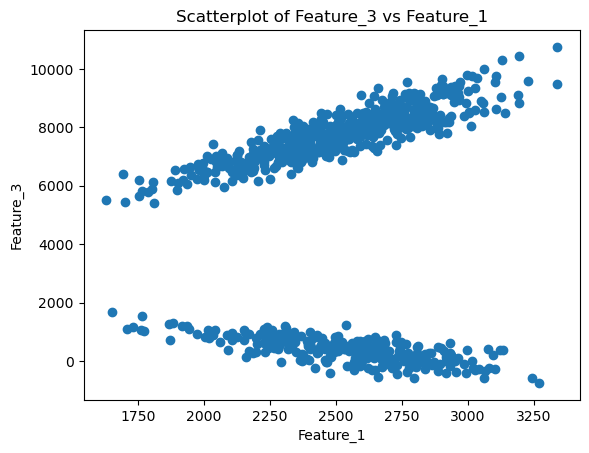

In [49]:
plt.scatter(data['Feature_1'], data['Feature_3'])
plt.xlabel('Feature_1')
plt.ylabel('Feature_3')
plt.title('Scatterplot of Feature_3 vs Feature_1')
plt.show()

Dumping the data frame into data.csv file.

In [50]:
data.to_csv('fake_data.csv', index=False)